# My first web scraper using BeautifulSoup 

As usual, after studying a new concept, I always try to apply what I have learned by doing personal projects. This time I will try web scraping for the first time ever using BeautifulSoup, and then perform some simple data analysis.

I am a big NBA fan. As the season has ended, here we are scraping the top NBA player stats this season. Link to the webpage: https://www.basketball-reference.com/leagues/NBA_2019_totals.html

In [1]:
# import necessary tools
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# NBA season we will be analyzing
year = 2019
# URL page we will scraping 
url = 'https://www.basketball-reference.com/leagues/NBA_2019_totals.html'.format(year)
# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)

In [3]:
# use findALL() to get the column headers
soup.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [4]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

Next, we will extract the data from the cells of the table in order to add it to our DataFrame.

In [5]:
stats = pd.DataFrame(player_stats, columns = headers)
stats.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Alex Abrines,SG,25,OKC,31,2,588,56,157,.357,...,.923,5,43,48,20,17,6,14,53,165
1,Quincy Acy,PF,28,PHO,10,0,123,4,18,.222,...,.700,3,22,25,8,1,4,4,24,17
2,Jaylen Adams,PG,22,ATL,34,1,428,38,110,.345,...,.778,11,49,60,65,14,5,28,45,108
3,Steven Adams,C,25,OKC,80,80,2669,481,809,.595,...,.500,391,369,760,124,117,76,135,204,1108
4,Bam Adebayo,C,21,MIA,82,28,1913,280,486,.576,...,.735,165,432,597,184,71,65,121,203,729
5,Deng Adel,SF,21,CLE,19,3,194,11,36,.306,...,1.000,3,16,19,5,1,4,6,13,32
6,DeVaughn Akoon-Purcell,SG,25,DEN,7,0,22,3,10,.300,...,.500,1,3,4,6,2,0,2,4,7
7,LaMarcus Aldridge,C,33,SAS,81,81,2687,684,1319,.519,...,.847,251,493,744,194,43,107,144,179,1727
8,Rawle Alkins,SG,21,CHI,10,1,120,13,39,.333,...,.667,11,15,26,13,1,0,8,7,37
9,Grayson Allen,SG,23,UTA,38,2,416,67,178,.376,...,.750,3,20,23,25,6,6,33,47,211


Now we have our own dataset! Let's perform some analysis.

## Highest Scoring Position?

Sometimes I wonder which position tends to score the most points in basketball. Let's make a bar chart and see.

First, we need to find the total points each position has scored this season.

In [6]:
sg_rows = stats.loc[stats['Pos'] == 'SG']
sg_rows['PTS'] = pd.to_numeric(sg_rows['PTS'])
SG = sg_rows['PTS'].sum()

pg_rows = stats.loc[stats['Pos'] == 'PG']
pg_rows['PTS'] = pd.to_numeric(pg_rows['PTS'])
PG = pg_rows['PTS'].sum()

sf_rows = stats.loc[stats['Pos'] == 'SF']
sf_rows['PTS'] = pd.to_numeric(sf_rows['PTS'])
SF = sf_rows['PTS'].sum()

pf_rows = stats.loc[stats['Pos'] == 'PF']
pf_rows['PTS'] = pd.to_numeric(pf_rows['PTS'])
PF = pf_rows['PTS'].sum()

c_rows = stats.loc[stats['Pos'] == 'C']
c_rows['PTS'] = pd.to_numeric(c_rows['PTS'])
C = c_rows['PTS'].sum()

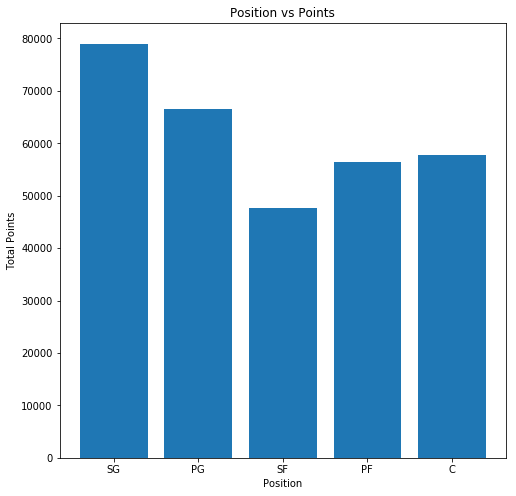

In [7]:
# make a bar chart
plt.figure(figsize = (8,8))
plt.title('Position vs Points')
plt.xlabel('Position')
plt.ylabel('Total Points')
x = ['SG', 'PG', 'SF', 'PF', 'C']
y = [SG, PG, SF, PF, C]
plt.bar(x, y)
plt.show()

## Top scorers 

In [8]:
# convert PTS type to numeric
stats['PTS'] = pd.to_numeric(stats['PTS'])
stats['PTS'].dtype

dtype('float64')

Here are the top 10 highest scoring players this season:

In [9]:
stats.sort_values(by=['PTS'], ascending=False).head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
277,James Harden,PG,29,HOU,78,78,2867,843,1909,.442,...,.879,66,452,518,586,158,58,387,244,2818.0
249,Paul George,SF,28,OKC,77,77,2841,707,1614,.438,...,.839,105,523,628,318,170,34,205,214,2159.0
689,Kemba Walker,PG,28,CHO,82,82,2863,731,1684,.434,...,.844,52,309,361,484,102,34,211,131,2102.0
48,Bradley Beal,SG,25,WAS,82,82,3028,764,1609,.475,...,.808,89,322,411,448,121,58,224,226,2099.0
416,Damian Lillard,PG,28,POR,80,80,2838,681,1533,.444,...,.912,68,303,371,551,88,34,212,148,2067.0
198,Kevin Durant,SF,30,GSW,78,78,2702,721,1383,.521,...,.885,33,464,497,457,58,84,225,155,2027.0
19,Giannis Antetokounmpo,PF,24,MIL,72,72,2358,721,1247,.578,...,.729,159,739,898,424,92,110,268,232,1994.0
165,Stephen Curry,PG,30,GSW,69,69,2331,632,1340,.472,...,.916,45,324,369,361,92,25,192,166,1881.0
670,Karl-Anthony Towns,C,23,MIN,77,77,2545,681,1314,.518,...,.836,263,691,954,259,67,125,240,292,1880.0
271,Blake Griffin,PF,29,DET,75,75,2622,619,1341,.462,...,.753,100,465,565,402,52,28,253,199,1841.0


Surprising, although SGs have the highest total points scored, there is only one SG in the top 10 highest scoring players! 

## What is the prime age?

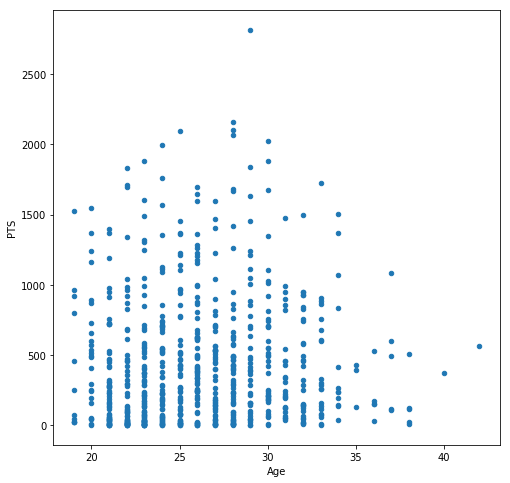

In [10]:
# make a bar chart
stats['Age'] = pd.to_numeric(stats['Age'])
stats.plot(kind='scatter', x='Age', y='PTS', figsize=(8, 8))

As you can see, players that are around the age of 25 to 30 tend to score the most. There is a clear decline for players that are older than 30.